In [2]:
## import dataset
import pandas as pd
data = pd.read_csv("/Users/MrMndFkr/Desktop/Monthly-Traffic-Volume-Analysis/data_reshaped.csv")
data.head()

,State,data_monthid,category,Million_Vehicle_Miles,area,monthid
0,alabama,200401,Rural_Arterial_200212,1298,rural,200212
1,alabama,200401,Urban_Arterial_200212,1550,urban,200212
2,alabama,200401,All_Arterial_200212,4623,all,200212
3,alaska,200401,Rural_Arterial_200212,85,rural,200212
4,alaska,200401,Urban_Arterial_200212,133,urban,200212


In [3]:
data.sort_values('monthid',ascending = True, inplace = True)

In [5]:
## create the maping of state to sub-region from the dataset
Northeast = list(map(lambda x:x.lower(), ['Connecticut','Maine','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania','Rhode Island','Vermont']))
Southatlantic = list(map(lambda x:x.lower(), ['Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia']))
Northcentral = list(map(lambda x:x.lower(), ['Illinois','Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']))
Southgulf = list(map(lambda x:x.lower(), ['Alabama','Arkansas','Kentucky','Louisiana','Mississippi','Oklahoma','Tennessee','Texas']))
West = list(map(lambda x:x.lower(), ['Alaska','Arizona','California','Colorado','Hawaii','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Wyoming']))

In [6]:
## apply the mapping to the dataframe
data.loc[data.State.isin(Northeast),'region'] = 'North_East'
data.loc[data.State.isin(Southatlantic),'region'] = 'South_Atlantic'
data.loc[data.State.isin(Northcentral),'region'] = 'North_Central'
data.loc[data.State.isin(Southgulf),'region'] = 'South_Gulf'
data.loc[data.State.isin(West),'region'] = 'West'

In [7]:
## check for duplicates
QC = data.groupby(['State','monthid','category']).agg({'Million_Vehicle_Miles':['count']}).reset_index()
QC.columns = ['State','monthid','category','value']
QC.iloc[0:10,]
QC.loc[(QC.value > 1)]

,State,monthid,category,value


In [39]:
## get data at month and region level
a = data.loc[data.area == 'all'].groupby(['region','monthid']).agg({'Million_Vehicle_Miles':['sum']}).reset_index()
a.columns = ['region','monthid','miles']
a.sort_values(['region','monthid'],ascending = True, inplace = True)

In [40]:
## get rolling 12 month sum
a['rolling_miles'] = a.groupby('region')['miles'].rolling(12).sum().values

In [41]:
## get date from monthid
a['month'] = a.monthid.astype(str)
a['date'] = pd.to_datetime(a.month, format='%Y%m')
a.head()

,region,monthid,miles,rolling_miles,month,date
0,North_Central,200212,53701,NaN,200212,2002-12-01
1,North_Central,200301,49200,NaN,200301,2003-01-01
2,North_Central,200302,45304,NaN,200302,2003-02-01
3,North_Central,200303,53315,NaN,200303,2003-03-01
4,North_Central,200304,54650,NaN,200304,2003-04-01


In [42]:
## remove nans and recent months as revised data is not available
b = a.loc[(~a.rolling_miles.isna()) & (a.monthid <= 201901)]
b.rolling_miles = b.rolling_miles / 1000000
b.head()

/Users/MrMndFkr/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,region,monthid,miles,rolling_miles,month,date
11,North_Central,200311,52823,0.664789,200311,2003-11-01
12,North_Central,200312,54621,0.665709,200312,2003-12-01
13,North_Central,200401,49470,0.665979,200401,2004-01-01
14,North_Central,200402,46740,0.667415,200402,2004-02-01
15,North_Central,200403,55495,0.669595,200403,2004-03-01


### Load required packages

In [43]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [44]:
%R library(scales)

array(['ggrepel', 'ggplot2', 'scales', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [45]:
%R library(ggplot2)

array(['ggrepel', 'ggplot2', 'scales', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [46]:
%R library(ggrepel)

array(['ggrepel', 'ggplot2', 'scales', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

### Get Region level Line Graphs

In [60]:
%R -i b

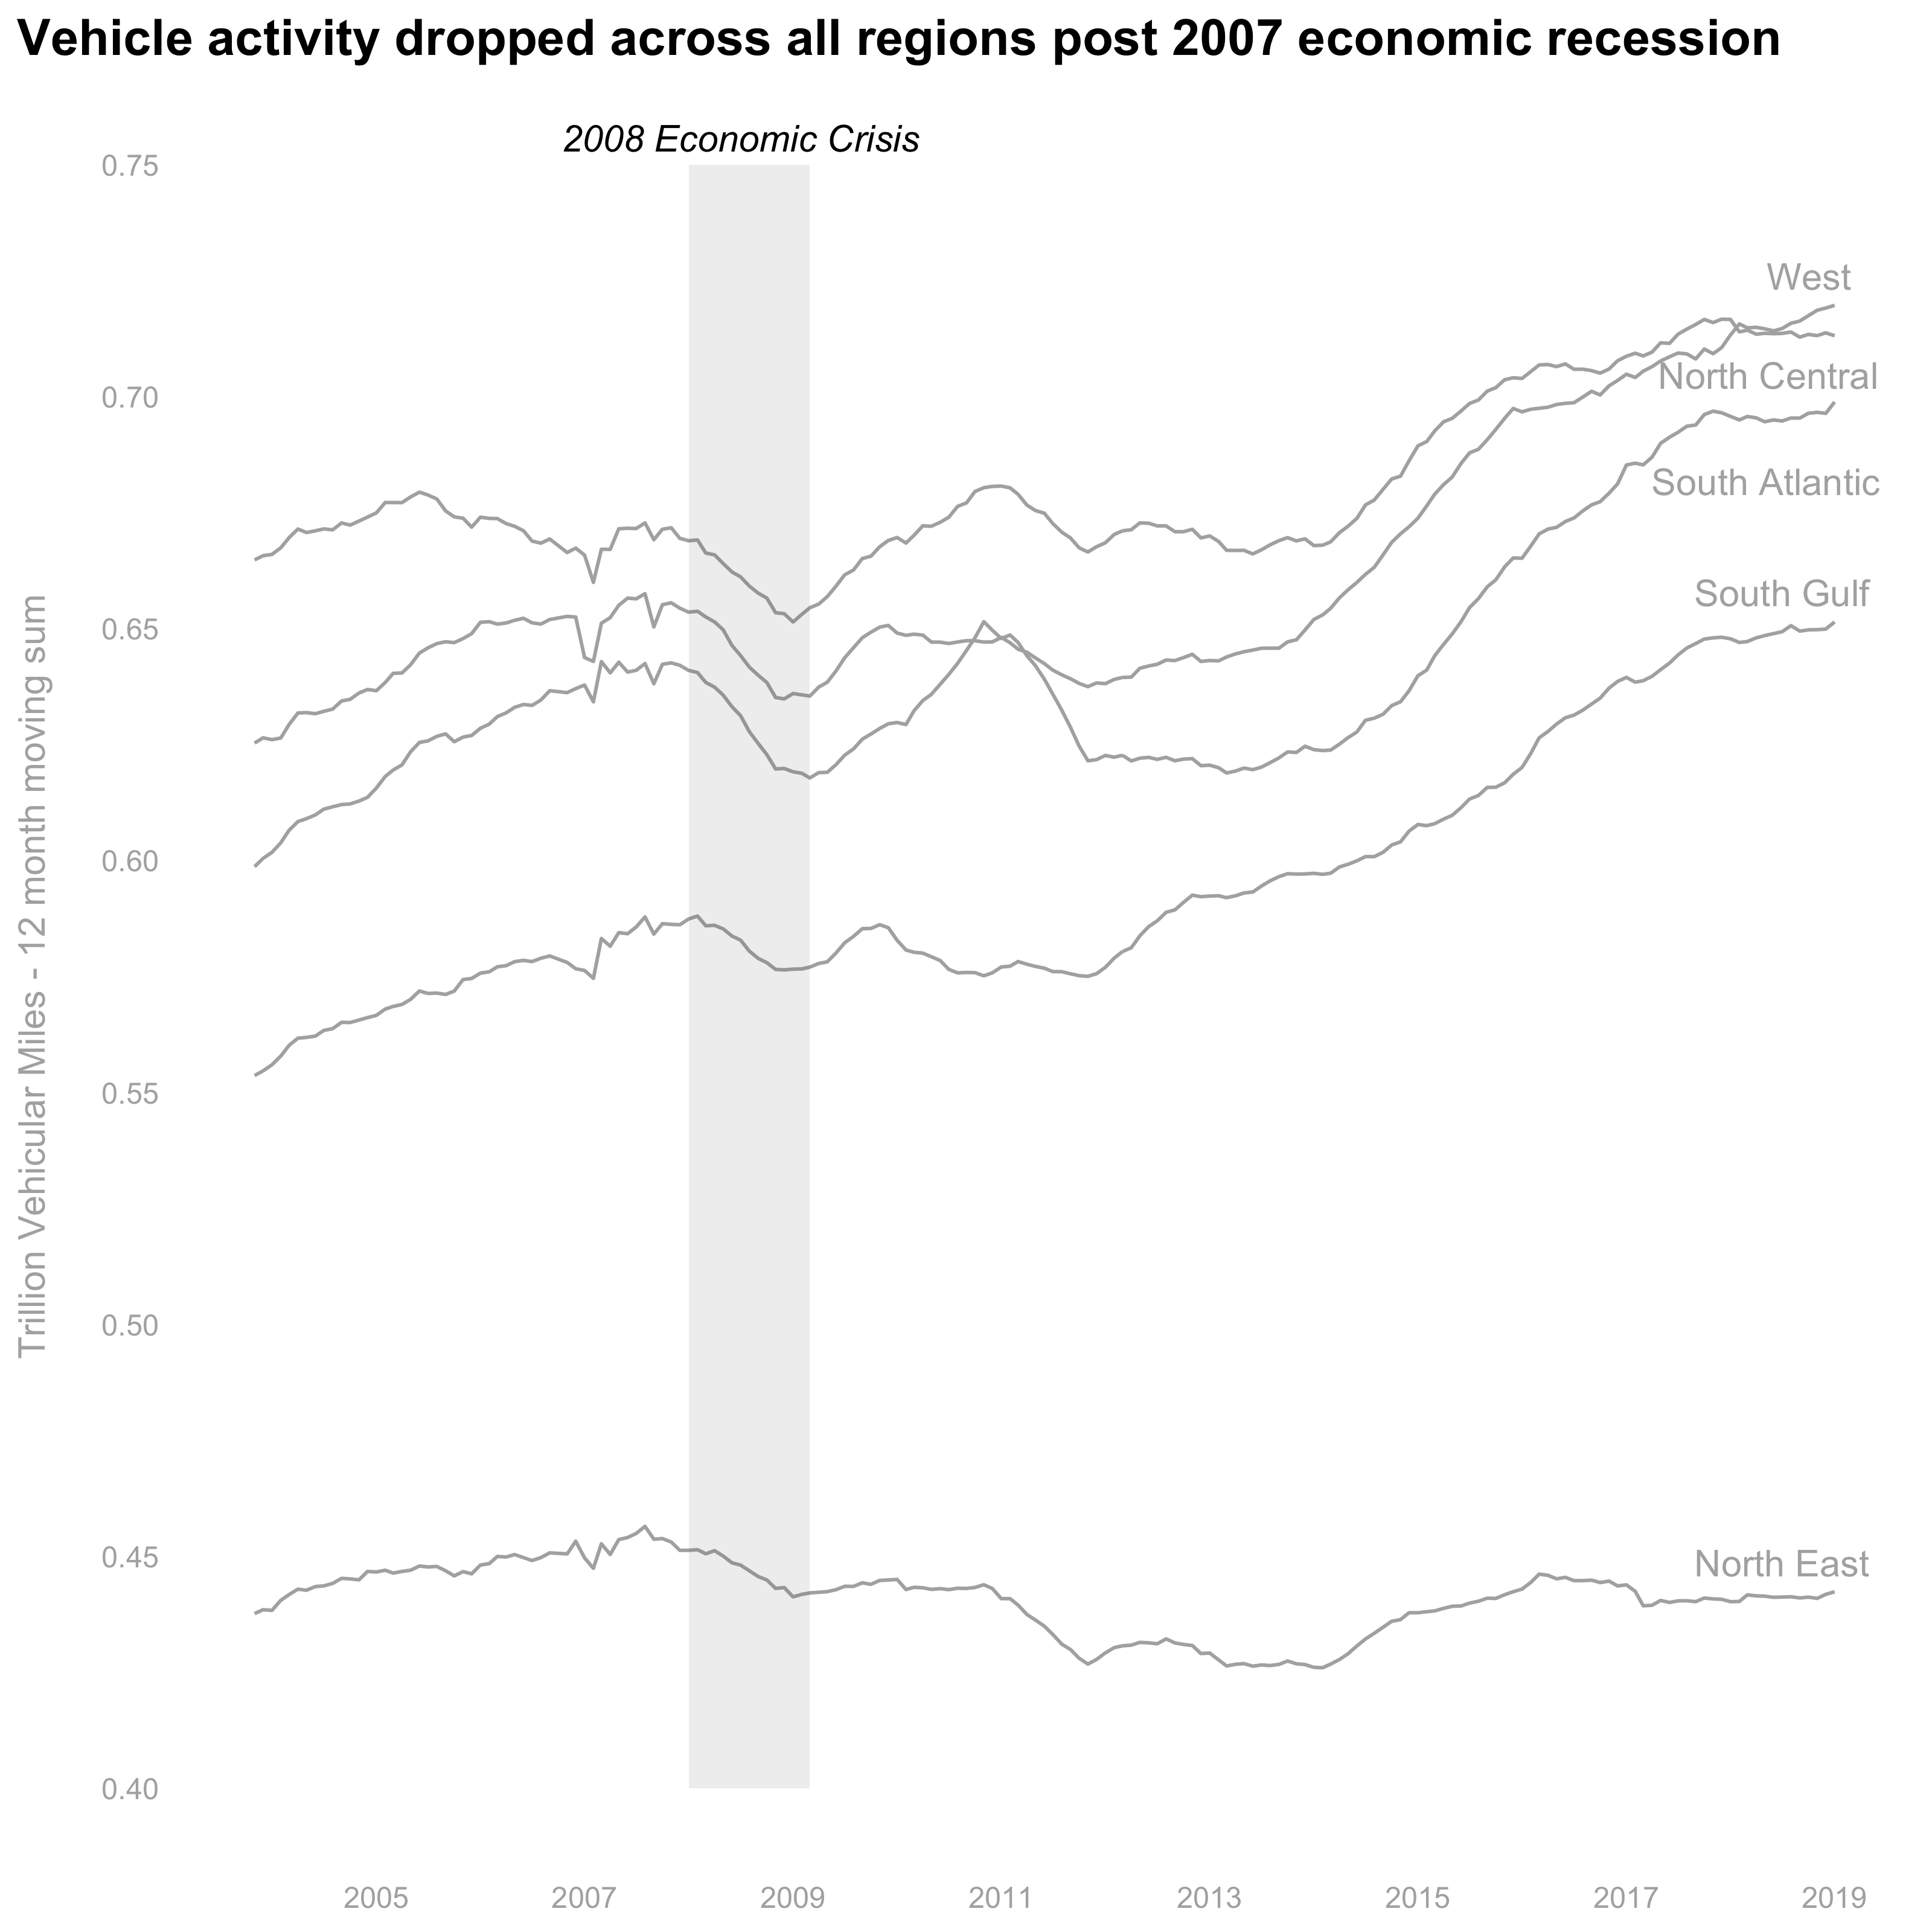

In [433]:
%%R -w 8 -h 8 --units in -r 400
ggplot(b) +
    geom_line(aes(x=date,y=rolling_miles, group = region), colour = 'grey69') + 
    geom_text(data = subset(b, month == "201901"& (region == 'South_Gulf' | region == 'North_East')), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = -0.6, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'West'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = -0.6, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'North_Central'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = 2, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'South_Atlantic'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = 3.5, colour = 'grey69') +
    theme_minimal() +
    theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.title.x = element_blank(), legend.position = "None") +
    annotate(geom='rect', xmin = as.POSIXct("2008-01-01", format = "%Y-%m-%d"), xmax = as.POSIXct("2009-03-01", format = "%Y-%m-%d"), ymin = 0.4, ymax = 0.75, alpha = 0.1 ) +
    annotate(geom='text', x = as.POSIXct("2008-07-01", format = "%Y-%m-%d"), y = 0.75, label = '2008 Economic Crisis', vjust = -0.5, fontface = 'italic') +
    ylab("Trillion Vehicular Miles - 12 month moving sum\n") + 
    scale_y_continuous(limits = c(0.4,0.75), breaks = seq(0.4, 0.75, by = 0.05)) + 
    scale_x_datetime(date_breaks = '2 year', labels=date_format('%Y')) +
    labs( title = "Vehicle activity dropped across all regions post 2007 economic recession") + 
    theme(plot.title = element_text(size=15, face = "bold"), axis.title.y = element_text(colour = 'grey69'), axis.text = element_text(colour = 'grey69') ) +
    theme(plot.title = element_text(hjust = 6))

#ggsave('/Users/MrMndFkr/Desktop/Monthly-Traffic-Volume-Analysis/Region Wise I.pdf', units = 'in', width = 8, height = 8)

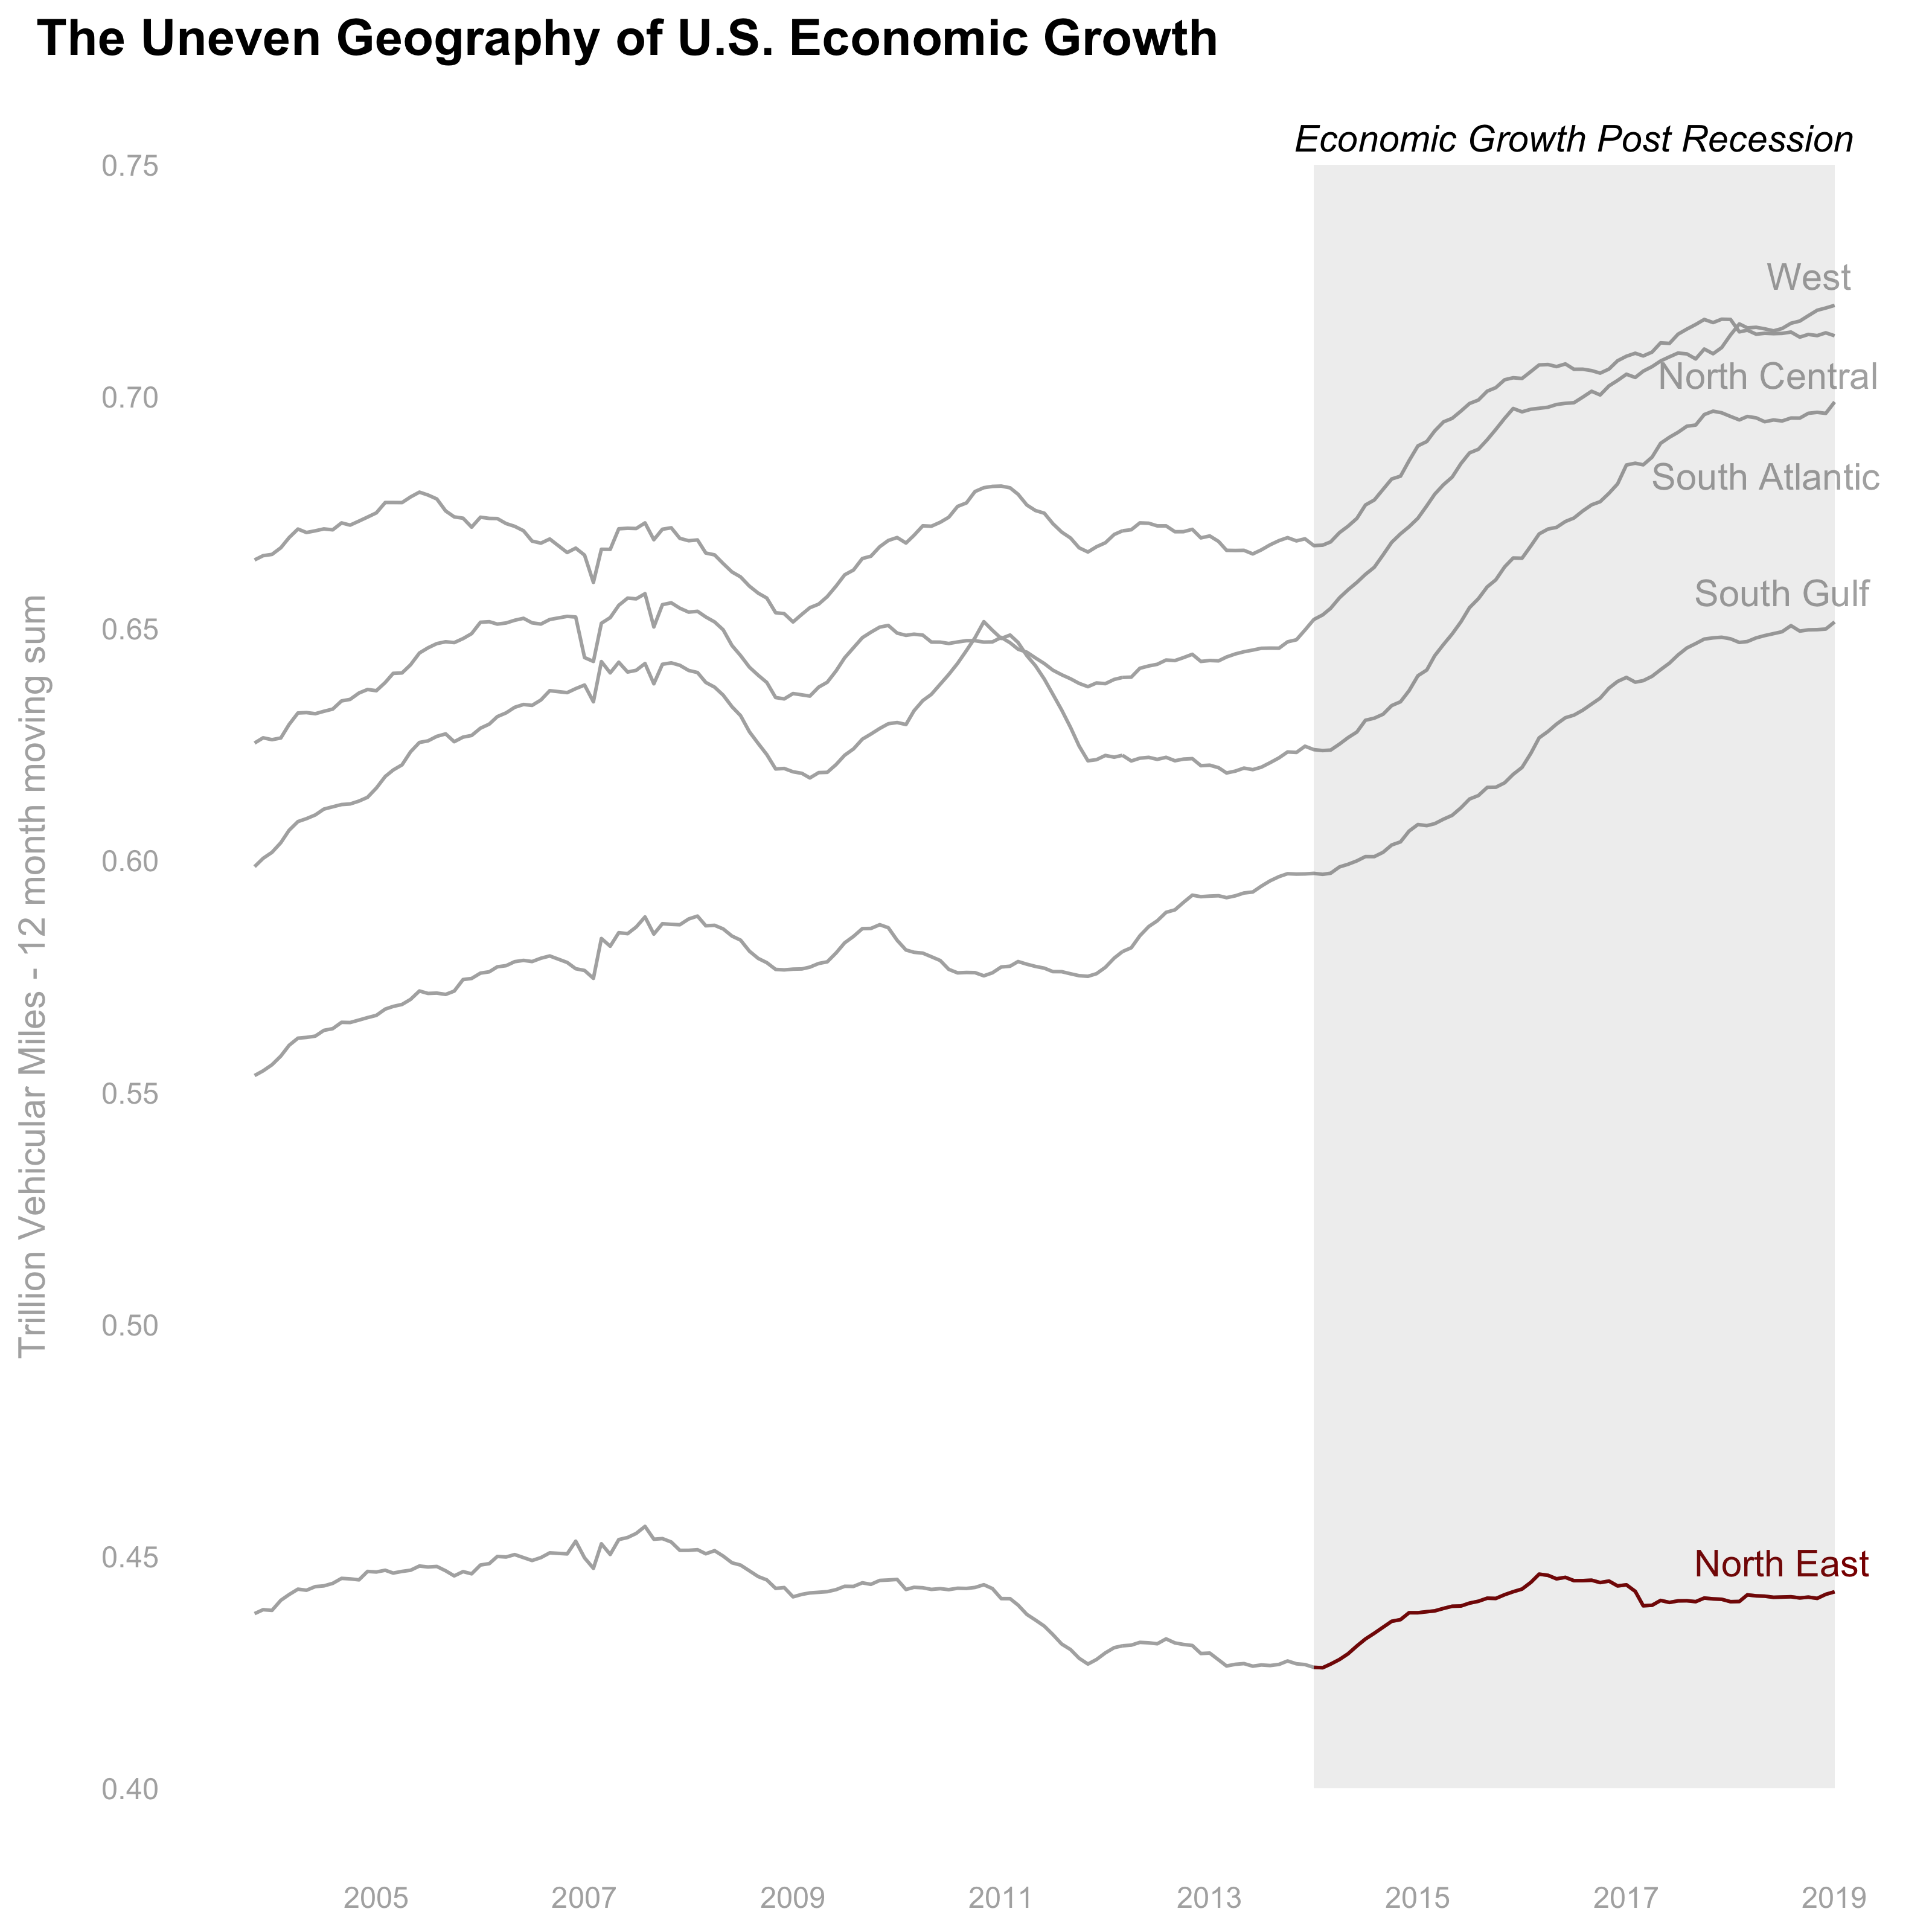

In [434]:
%%R -w 8 -h 8 --units in -r 400
ggplot(b) +
    geom_line(aes(x=date,y=rolling_miles, group = region), colour = 'grey69') + 
    geom_line(data = subset(b, date >= '2014-01-01' & region == 'North_East'), aes(x=date,y=rolling_miles), colour = 'red4') +
    geom_text(data = subset(b, month == "201901" & region == 'South_Gulf'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles),  hjust = 0.8, vjust = -0.6, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'South_Atlantic'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = 3.3, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'North_Central'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = 2, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'West'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = -0.6, colour = 'grey69') +
    geom_text(data = subset(b, month == "201901" & region == 'North_East'), aes(label = gsub("_", " ", region), colour = 'grey69', x = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), y = rolling_miles), hjust = 0.8, vjust = -0.6, colour = 'red4') +
    theme_minimal() +
    theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.title.x = element_blank(), legend.position = "None") +
    annotate(geom='rect', xmin = as.POSIXct("2014-01-01", format = "%Y-%m-%d"), xmax = as.POSIXct("2019-01-01", format = "%Y-%m-%d"), ymin = 0.4, ymax = 0.75, alpha = 0.1 ) +
    annotate(geom='text', x = as.POSIXct("2016-07-01", format = "%Y-%m-%d"), y = 0.75, label = 'Economic Growth Post Recession', vjust = -0.5, fontface = 'italic') +
    ylab("Trillion Vehicular Miles - 12 month moving sum\n") + 
    scale_y_continuous(limits = c(0.4,0.75), breaks = seq(0.4, 0.75, by = 0.05)) +
    scale_x_datetime(date_breaks = '2 year', labels=date_format('%Y')) +
    labs( title = "The Uneven Geography of U.S. Economic Growth") + 
    theme(plot.title = element_text(size=15, face = "bold"), axis.title.y = element_text(colour = 'grey69'), axis.text = element_text(colour = 'grey69') ) +
    theme(plot.title = element_text(hjust = -0.25))

#ggsave('/Users/MrMndFkr/Desktop/Monthly-Traffic-Volume-Analysis/Region Wise II.pdf', units = 'in', width = 8.5, height = 8)

### Slope graph for disasters

### We will show a slope graph for Alabama - just before and 12 months after the disaster. Hurricane Katrina happened in end of Aug 2005, so we will take Aug 2005 and Aug 2006. We will have seperate lines for urban and rural areas for comparison

In [210]:
## subsetting and aggregating
c = data.loc[(data.State.isin(['louisiana','alabama'])) & (data.area.isin(['rural','urban']))]
c.loc[:,'month'] = c.monthid.astype(str)
c.loc[:,'date'] = pd.to_datetime(c.month, format='%Y%m')
c.head()

,State,data_monthid,category,Million_Vehicle_Miles,area,monthid,region,month,date
0,alabama,200401,Rural_Arterial_200212,1298,rural,200212,South_Gulf,200212,2002-12-01
1,alabama,200401,Urban_Arterial_200212,1550,urban,200212,South_Gulf,200212,2002-12-01
55,louisiana,200401,Urban_Arterial_200212,1414,urban,200212,South_Gulf,200212,2002-12-01
54,louisiana,200401,Rural_Arterial_200212,1010,rural,200212,South_Gulf,200212,2002-12-01
154,alabama,200402,Urban_Arterial_200301,1511,urban,200301,South_Gulf,200301,2003-01-01


In [211]:
### 12 month moving sum
c.sort_values(['State','area','monthid'],ascending = True, inplace = True)
c.loc[:,'rolling_miles'] = c.groupby(['State','area'])['Million_Vehicle_Miles'].rolling(12).sum().values
c.head()

/Users/MrMndFkr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,data_monthid,category,Million_Vehicle_Miles,area,monthid,region,month,date,rolling_miles
0,alabama,200401,Rural_Arterial_200212,1298,rural,200212,South_Gulf,200212,2002-12-01,NaN
153,alabama,200402,Rural_Arterial_200301,1235,rural,200301,South_Gulf,200301,2003-01-01,NaN
306,alabama,200403,Rural_Arterial_200302,1195,rural,200302,South_Gulf,200302,2003-02-01,NaN
459,alabama,200404,Rural_Arterial_200303,1441,rural,200303,South_Gulf,200303,2003-03-01,NaN
612,alabama,200405,Rural_Arterial_200304,1462,rural,200304,South_Gulf,200304,2003-04-01,NaN


In [228]:
## some more manipulations
d = c.loc[(~c.rolling_miles.isna()) & (c.monthid.isin([200508,200608]))]
d.rolling_miles = d.rolling_miles / 1000
d.loc[d.monthid == 200508 ,'period'] = 'Before the disaster'
d.loc[d.monthid == 200608 ,'period'] = '12 months after Hurricane Katrina'
d.head(10)

,State,data_monthid,category,Million_Vehicle_Miles,area,monthid,region,month,date,rolling_miles,period
4896,alabama,200609,Rural_Arterial_200508,1521,rural,200508,South_Gulf,200508,2005-08-01,17.126,Before the disaster
6732,alabama,200709,Rural_Arterial_200608,1480,rural,200608,South_Gulf,200608,2006-08-01,16.787,12 months after Hurricane Katrina
4897,alabama,200609,Urban_Arterial_200508,1716,urban,200508,South_Gulf,200508,2005-08-01,19.646,Before the disaster
6733,alabama,200709,Urban_Arterial_200608,1889,urban,200608,South_Gulf,200608,2006-08-01,20.904,12 months after Hurricane Katrina
4950,louisiana,200609,Rural_Arterial_200508,1228,rural,200508,South_Gulf,200508,2005-08-01,12.562,Before the disaster
6786,louisiana,200709,Rural_Arterial_200608,1094,rural,200608,South_Gulf,200608,2006-08-01,11.718,12 months after Hurricane Katrina
4951,louisiana,200609,Urban_Arterial_200508,1784,urban,200508,South_Gulf,200508,2005-08-01,19.323,Before the disaster
6787,louisiana,200709,Urban_Arterial_200608,2009,urban,200608,South_Gulf,200608,2006-08-01,21.881,12 months after Hurricane Katrina


In [224]:
%R -i d

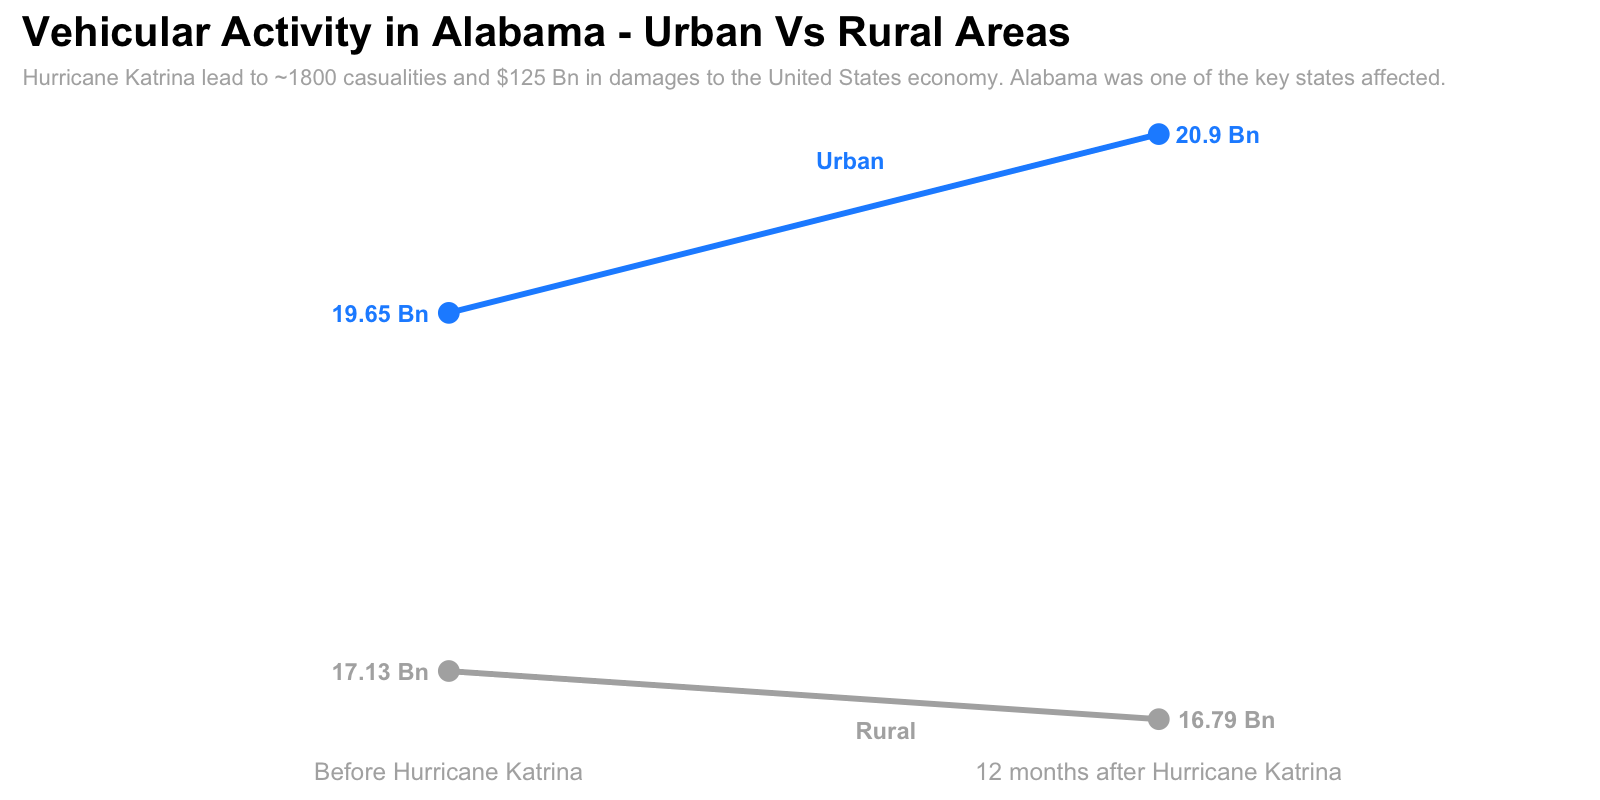

In [432]:
%%R -w 8 -h 4 --units in -r 200
ggplot(d) + 
    geom_line(data = subset(d,State == 'alabama'), aes(x = reorder(period,monthid), y = rolling_miles , group = area, colour = area),  alpha = 1, size = 1 ) +
    geom_point(data = subset(d,State == 'alabama'),aes(x = reorder(period,monthid), y = rolling_miles , group = State, colour = area), alpha = 1, size  = 3) +
    scale_x_discrete(labels = c('Before Hurricane Katrina', '12 months after Hurricane Katrina')) +
    scale_colour_manual(values = c("grey69" , "dodgerblue")) +
    theme_bw() +
    theme(panel.border = element_blank(), axis.line = element_blank(),legend.position = "None",axis.ticks = element_blank()) +
    theme(axis.title.y = element_blank(),axis.text.y = element_blank(),panel.grid.major.y = element_blank(),panel.grid.minor.y = element_blank()) +
    theme(axis.title.x = element_blank(),panel.grid.major.x = element_blank()) +
    geom_text_repel(data = subset(d, State == 'alabama' & period == "12 months after Hurricane Katrina"), aes(x = period, y = rolling_miles, label = paste(toupper(substr(area,1,1)),substr(area,2,nchar(area)),sep="")) , fontface = "bold",hjust = 5, vjust = 2,  size = 3, colour = c("grey69" , "dodgerblue"), segment.colour = NA) +
    geom_text_repel(data = subset(d, State == 'alabama' & period == "12 months after Hurricane Katrina"), aes(x = period, y = rolling_miles, label = paste(round(rolling_miles,2),'Bn')) , fontface = "bold",hjust = -0.2,  size = 3, segment.colour = NA, colour = c("grey69", "dodgerblue")) +
    geom_text(data = subset(d, State == 'alabama' & period == "Before the disaster"), aes(x = period, y = rolling_miles, label = paste(round(rolling_miles,2),'Bn')) , fontface = "bold", hjust = 1.2,  size = 3,  colour = c("grey69", "dodgerblue")) +
    theme(plot.title = element_text(size=15, face = "bold"), plot.subtitle = element_text(size = 8, colour = 'grey69')) +
    theme(axis.text = element_text(colour = 'grey69') ) +
    labs( title = "Vehicular Activity in Alabama - Urban Vs Rural Areas", 
         subtitle = "Hurricane Katrina lead to ~1800 casualities and $125 Bn in damages to the United States economy. Alabama was one of the key states affected.")

#ggsave('/Users/MrMndFkr/Desktop/Monthly-Traffic-Volume-Analysis/Urban Vs Rural.pdf', units = 'in', width = 8, height = 4)   
